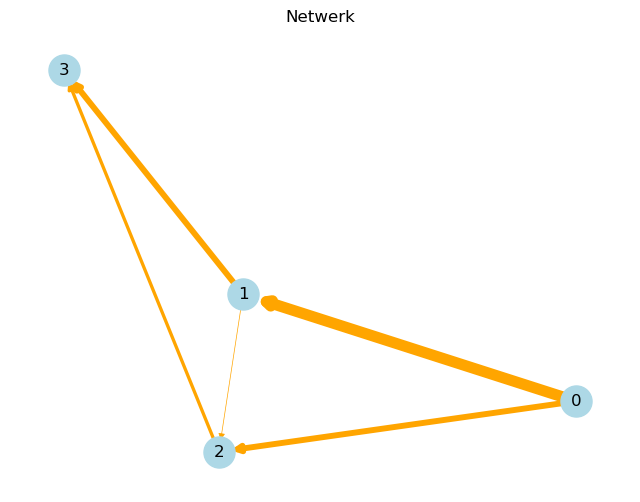

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_weighted_edges_from([(0,1,5),(0,2,3),(1,2,10),(1,3,8),(2,3,2)])


OD_Matrix = np.array([
    [0, 100, 50, 30],
    [0, 0, 60, 80],
    [0, 0, 0, 40],
    [0, 0, 0, 0]
])
routes = []

#def Graph_To_Segments(G): 
 #   segments = []
  #  return segments 

def Matrix_To_Routes(OD_Matrix, G):
    #OD_Matrix = matrix met aantal verplaatsingen tussen i en j
    #TT_Matrix = matrix met reistijden tussen i en j
    #G: De graaf, het netwerk met lijnstukjes en reistijden per lijnstukje
    routes = np.zeros((len(OD_Matrix),len(OD_Matrix)), dtype = object)
    for i in range(len(OD_Matrix)):
        for j in range(len(OD_Matrix)):
            if i != j and OD_Matrix[i][j] > 0:
                routes[i][j] = nx.shortest_path(G, source = i, target = j, weight = 'weight') #path with least travel time on the network
    return routes #een lijst met de kortste route voor elke relatie, elke route is ook een lijst

def get_segments(G):
    segments = list(G.edges())
    return segments #een lijst met alle verbindingen als tupel

def Travelers_On_Segment(segment, routes, OD_Matrix): 
    counter = 0
    u, v = segment
    for i in range(len(routes)):
        for j in range(len(routes[i])):
            route = routes[i][j]
            if route is None or isinstance(route, (int, float)):
                continue

            for k in range(len(route) - 1):
                if route[k] == u and route[k+1] == v:
                    counter += OD_Matrix[i][j]
    return counter #Het aantal reizigers op een edge (er is onderscheid per richting)

def Travelers_On_Segments(segments, routes, OD_Matrix):
    travelers_on_segments = []
    for segment in segments:
        travelers_on_segments.append(Travelers_On_Segment(segment, routes, OD_Matrix))
    return travelers_on_segments #een lijst met het aantal reizigers per segment: traverelers_on_segments[i] = het aantal reizigers op segment i

def Visualisation_travelers(G, routes, OD_Matrix):
    segments = get_segments(G)
    travelers = Travelers_On_Segments(segments, routes, OD_Matrix)
    travelers = np.array(travelers)
    min_width, max_width = 0.5, 8
    if travelers.max() > 0:
        edge_width = np.interp(travelers, (travelers.min(), travelers.max()), (min_width, max_width))
    else:
        edge_width = [1 for _ in travelers]

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8,6))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color = "lightblue")
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=segments, width=edge_width, edge_color="orange", arrows=True)

    plt.title("Netwerk")
    plt.axis("off")
    plt.show()

routes = Matrix_To_Routes(OD_Matrix, G)
Visualisation_travelers(G, routes, OD_Matrix)

    #Use the amount of people on each segment to change the visual of the line on the segment. 


    #voor elk segment, kijk hoeveel routes daar over gaan.
    #voor elke route over elke segment, vermenigvuldig de route met het aantal reizigers op die route.
    #

#def Travelers_On_Segment(routes, segments, OD_Matrix):
    #Voor elk stukje op het netwerk, kijk hoeveel paden er over het netwerk gaan
    #counter = 0
    #segmentpathcount = []
    #for segment in segments:
     #   for routes[i][j] in routes:
      #      if route.count(segment[0]) > 0 and route.count(segment[1]) > 0:
       #         counter += OD_Matrix[i][j]
        #segmentpathcount.append(counter)
    #return segmentpathcount
        #tel het aantal paden dat dit segment bevatten en sla dat op
        #segmentpathcount[i] = het aantal paden op segment[i]

#def Link_segment_to_segmentpathcount(segments, segmentpathcount):
 #   routes_per_segment = []
  #  for segment in segments:
   #     for something in segmentpathcount:
    #        routes_per_segment.append([segment, something])
    #return routes_per_segment
    #routes_per_segment[i] = [segment[i],segmentpathcount[i]]




